In [ ]:
import pandas as pd
df = pd.read_csv("https://mdaquin.github.io/t/TdD_S3_2021/movies_metadata.csv")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
import datetime
def getY(x):
  try: return datetime.datetime.strptime(str(x), "%Y-%m-%d").year
  except: return float("NaN") 
df["year"] = df["release_date"].apply(getY)
print(f'{df["year"].count()*100/len(df)}% complete')
df_r = df[df["year"].notnull()]
print(f'{df_r["year"].count()*100/len(df_r)}% complete')
print(df["year"].describe())

99.80204988342938% complete
100.0% complete
count    45376.000000
mean      1991.881193
std         24.055360
min       1874.000000
25%       1978.000000
50%       2001.000000
75%       2010.000000
max       2020.000000
Name: year, dtype: float64


In [ ]:
df_rr = df_r[df_r["revenue"].notnull()]
df_rr = df_rr[df_rr["runtime"].notnull()]
df_rr.shape
def tofloat(x):
  return float(x)
def toint(x):
  return int(x)
df_rr["budget"] = df_rr["budget"].apply(tofloat)
df_rr["popularity"] = df_rr["popularity"].apply(tofloat)
df_rrr=df_rr[["id", "title", "year", "budget", "popularity", "revenue", "runtime"]]
df_rrrr = df_rrr.drop_duplicates(subset=["id"])
df_rrrr["id"] = df_rrrr["id"].apply(toint)
df_rrrr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,id,title,year,budget,popularity,revenue,runtime
0,862,Toy Story,1995.0,30000000.0,21.946943,373554033.0,81.0
1,8844,Jumanji,1995.0,65000000.0,17.015539,262797249.0,104.0
2,15602,Grumpier Old Men,1995.0,0.0,11.712900,0.0,101.0
3,31357,Waiting to Exhale,1995.0,16000000.0,3.859495,81452156.0,127.0
4,11862,Father of the Bride Part II,1995.0,0.0,8.387519,76578911.0,106.0
...,...,...,...,...,...,...,...
45460,30840,Robin Hood,1991.0,0.0,5.683753,0.0,104.0
45462,111109,Century of Birthing,2011.0,0.0,0.178241,0.0,360.0
45463,67758,Betrayal,2003.0,0.0,0.903007,0.0,90.0
45464,227506,Satan Triumphant,1917.0,0.0,0.003503,0.0,87.0


In [ ]:
import json
def firstGenre(x):
  jsx = json.loads(x.replace("'", '"')) 
  if len(jsx) > 0 : 
    return jsx[0]["name"]
df_rr.genres.apply(firstGenre)
df_rrrr["genre"] = df_rr.genres.apply(firstGenre)

df_rrrr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,id,title,year,budget,popularity,revenue,runtime,genre
0,862,Toy Story,1995.0,30000000.0,21.946943,373554033.0,81.0,Animation
1,8844,Jumanji,1995.0,65000000.0,17.015539,262797249.0,104.0,Adventure
2,15602,Grumpier Old Men,1995.0,0.0,11.712900,0.0,101.0,Romance
3,31357,Waiting to Exhale,1995.0,16000000.0,3.859495,81452156.0,127.0,Comedy
4,11862,Father of the Bride Part II,1995.0,0.0,8.387519,76578911.0,106.0,Comedy
...,...,...,...,...,...,...,...,...
45460,30840,Robin Hood,1991.0,0.0,5.683753,0.0,104.0,Drama
45462,111109,Century of Birthing,2011.0,0.0,0.178241,0.0,360.0,Drama
45463,67758,Betrayal,2003.0,0.0,0.903007,0.0,90.0,Action
45464,227506,Satan Triumphant,1917.0,0.0,0.003503,0.0,87.0,None


In [ ]:
rdf = pd.read_csv("https://mdaquin.github.io/t/TdD_S3_2021/ratings_small.csv")
ardf = rdf[["movieId", "rating"]].groupby("movieId").mean().rename(columns={"rating": "average rating"})
crdf = rdf[["movieId", "rating"]].groupby("movieId").count().rename(columns={"rating": "number of ratings"})
jrdf = ardf.join(crdf)
movies = pd.merge(df_rrrr, jrdf, left_on="id", right_on="movieId")
movies.describe()

,id,year,budget,popularity,revenue,runtime,average rating,number of ratings
count,2826.000000,2826.000000,2.826000e+03,2826.000000,2.826000e+03,2826.000000,2826.000000,2826.000000
mean,17030.231776,1987.342887,1.396692e+07,6.315256,4.787786e+07,105.440906,3.333316,15.907997
std,28276.966943,21.424201,3.119462e+07,7.001122,1.245096e+08,27.537345,0.839324,30.976749
min,2.000000,1896.000000,0.000000e+00,0.000001,0.000000e+00,0.000000,0.500000,1.000000
25%,1373.250000,1974.000000,0.000000e+00,1.417714,0.000000e+00,92.000000,3.000000,1.000000
50%,3152.500000,1995.000000,0.000000e+00,4.955004,0.000000e+00,103.000000,3.500000,4.000000
75%,26002.000000,2004.000000,1.300000e+07,9.671148,3.200000e+07,118.000000,3.941001,15.000000
max,160718.000000,2015.000000,3.800000e+08,140.950236,1.845034e+09,320.000000,5.000000,324.000000


In [ ]:
countPY = movies[["year","popularity"]].groupby("year").count().rename(columns={"popularity": "count"})
budPY = movies[["year","budget"]].groupby("year").mean()
popPY = movies[["year","popularity"]].groupby("year").mean()
revPY = movies[["year","revenue"]].groupby("year").mean()
rtPY = movies[["year","runtime"]].groupby("year").mean()
arPY = movies[["year","average rating"]].groupby("year").mean()
rcPY = movies[["year","number of ratings"]].groupby("year").mean()
years = countPY.join(budPY).join(popPY).join(revPY).join(rtPY).join(arPY).join(rcPY)
years


,count,budget,popularity,revenue,runtime,average rating,number of ratings
year,,,,,,,
1896.0,1,0.000000e+00,5.256608,0.000000e+00,1.000000,2.341270,63.000000
1900.0,1,0.000000e+00,1.109068,0.000000e+00,1.000000,5.000000,1.000000
1902.0,1,5.985000e+03,6.321801,0.000000e+00,14.000000,2.000000,1.000000
1903.0,1,0.000000e+00,0.141611,0.000000e+00,2.000000,4.000000,1.000000
1910.0,1,0.000000e+00,1.659883,0.000000e+00,13.000000,3.892857,14.000000
...,...,...,...,...,...,...,...
2011.0,44,2.117295e+07,4.449350,6.022681e+07,93.340909,3.316481,5.454545
2012.0,28,9.565893e+06,3.945094,1.335441e+07,89.857143,3.456073,8.607143
2013.0,5,2.227668e+06,2.179635,4.317540e+06,87.000000,4.104545,5.400000


In [ ]:
rev_gy = movies[movies.year > 1990].pivot_table(values="revenue", index="genre", columns="year", aggfunc="mean")
rev_gy

year,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,...,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0
genre,,,,,,,,,,,,,,,,,,,,,
Action,1.202786e+08,9.333333e+07,2.620322e+07,5.852254e+07,1.351656e+08,1.233984e+08,1.188040e+08,9.794172e+07,9.810247e+07,1.333464e+08,...,1.121481e+08,6.964100e+07,7.932695e+07,6.644257e+07,5.501645e+06,9.075006e+07,0.000000e+00,NaN,NaN,NaN
Adventure,2.304496e+08,3.217315e+08,6.444879e+08,4.806344e+07,1.760970e+08,4.576964e+08,1.496029e+08,3.648763e+07,1.591948e+08,2.042115e+08,...,2.388500e+08,2.390712e+08,3.776721e+08,2.652561e+08,NaN,1.045714e+09,1.830185e+08,NaN,NaN,NaN
Animation,NaN,NaN,0.000000e+00,0.000000e+00,1.991956e+06,1.251000e+08,NaN,NaN,NaN,1.225154e+07,...,2.263058e+08,2.640249e+08,NaN,0.000000e+00,0.000000e+00,2.799262e+08,7.370600e+04,0.0,NaN,NaN
Comedy,8.187820e+06,1.494884e+07,1.127729e+08,7.882234e+07,4.248247e+07,4.521902e+07,9.336277e+07,5.960400e+05,5.061716e+07,1.102867e+08,...,4.557463e+07,6.853783e+07,8.305056e+07,0.000000e+00,0.000000e+00,3.685305e+07,1.257983e+07,NaN,NaN,NaN
Crime,1.281921e+08,1.466101e+07,NaN,5.028277e+07,3.276565e+07,1.221352e+08,4.888544e+07,7.106734e+07,4.990195e+07,1.417381e+07,...,5.955287e+07,5.214713e+07,4.260550e+07,NaN,0.000000e+00,0.000000e+00,3.108360e+07,NaN,39407616.0,NaN
Documentary,0.000000e+00,0.000000e+00,NaN,3.174695e+06,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,...,3.147143e+02,3.505502e+06,9.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN
Drama,3.593932e+07,3.339939e+07,5.552407e+07,2.961392e+07,6.307614e+07,2.658212e+07,1.155385e+08,1.995788e+07,6.910929e+07,5.097698e+07,...,3.092690e+07,1.446515e+07,5.748104e+07,2.707397e+06,0.000000e+00,7.876003e+06,0.000000e+00,10793850.0,NaN,NaN
Family,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,0.000000e+00,3.451414e+08,...,NaN,1.067288e+08,NaN,NaN,NaN,0.000000e+00,NaN,0.0,NaN,NaN
Fantasy,NaN,0.000000e+00,NaN,1.708156e+08,1.036504e+08,5.763369e+07,2.548049e+07,0.000000e+00,1.537318e+08,4.328088e+07,...,1.087292e+08,4.329067e+08,6.645000e+07,4.676279e+07,2.152837e+08,NaN,NaN,NaN,NaN,NaN


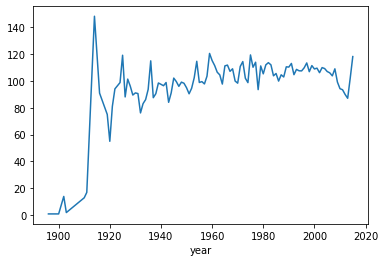

In [ ]:
years["runtime"].plot()

#rev_gy.T.plot(figsize=(12,6))

#years["count"].plot(kind="area")
#years["count"].plot(kind="bar", figsize=(12,5), fontsize=7)
#years["count"].sort_values().plot(kind="barh", figsize=(5,12), fontsize=7)

def budCat(x):
  if x == 0: return "unknown budget"
  if x >  movies.loc[movies["budget"]!=0,"budget"].mean(): return "high budget"
  if x <= movies.loc[movies["budget"]!=0,"budget"].mean(): return "low budget"

#movies["budget"].apply(budCat).value_counts().plot(kind="pie", figsize=(8,8), fontsize=18)

#colors = [((x%5)/5, (x%3)/3, (x%4)/4) for x in range(20)]
#movies["genre"].value_counts().plot(kind="pie", figsize=(10,10), fontsize=18, colors=colors)

# pl = years["revenue"].sort_index().plot(kind="area", figsize=(8,5), style="#cc4477")
# pl.set_facecolor('#383838')

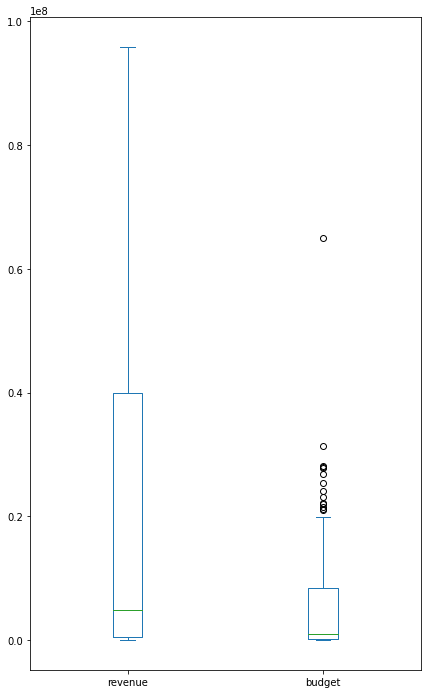

In [ ]:
#movies["average rating"].plot(kind="hist", figsize=(7,5), bins=5)
#movies["average rating"].describe()
#movies["average rating"].plot(kind="box", figsize=(8,10))

years[["revenue", "budget"]].plot(kind="box", figsize=(7, 12))


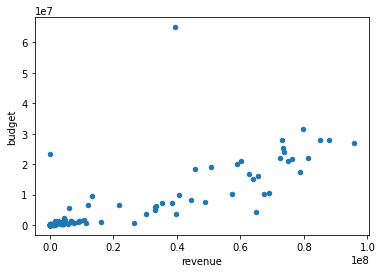

In [ ]:
#years[["revenue", "budget"]].sort_index().plot(kind="bar", figsize=(18, 5), stacked=True)
#years[["revenue", "budget"]].sort_index().plot(kind="area", figsize=(18, 5), stacked=False)

#pl = years[["revenue", "budget"]].sort_index().plot(kind="area", figsize=(18, 5), stacked=False, style=["#8844DD", "#DD4488"])
#pl.set_facecolor("#000")

years[["budget", "revenue"]].plot(kind="scatter", x="revenue", y="budget")


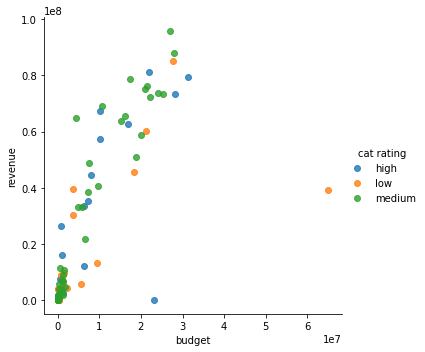

In [ ]:
import seaborn as sns
import math
years_c = years.copy()
years_c["cat rating"] = years_c["number of ratings"].apply(lambda x: "low" if x < 10 else "medium" if x < 20 else "high")
sns.lmplot(x='budget', y='revenue', hue="cat rating", fit_reg=False, data=years_c)


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


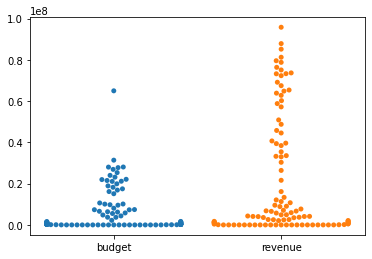

In [ ]:
#sns.violinplot(data=years[["budget", "revenue"]])
sns.swarmplot(data=years[["budget", "revenue"]])


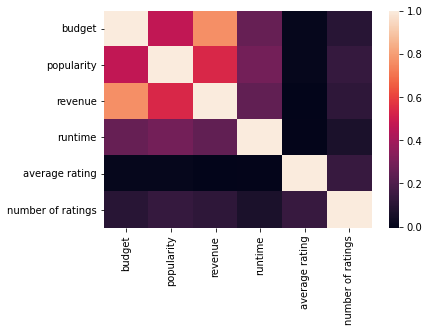

In [ ]:
# corrélation entre chaque colonne 
corr = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]].corr()
sns.heatmap(corr)

[[3.28597885e+06 4.47033115e+00 4.30640959e+06 1.01862270e+02
  3.33442154e+00 1.41790040e+01]
 [1.64863636e+08 2.67768065e+01 9.44327929e+08 1.42772727e+02
  3.26391989e+00 2.77272727e+01]
 [5.81342848e+07 1.39215408e+01 2.29593505e+08 1.19441718e+02
  3.33781570e+00 2.08773006e+01]
 [3.52223478e+07 1.10440355e+01 9.45720807e+07 1.15939759e+02
  3.33119370e+00 2.11174699e+01]
 [9.18668750e+07 1.69703138e+01 4.51336991e+08 1.22787500e+02
  3.32122732e+00 2.90875000e+01]]


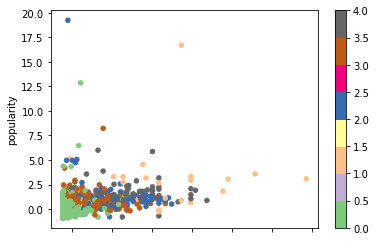

In [ ]:
from sklearn.cluster import KMeans

ndf = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]]
ndf = ndf.apply(lambda x: (x - x.mean())/x.std())

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

ndf.plot(kind="scatter", x="budget", y="popularity", c=kmeans.labels_.astype(float), colormap="Accent")

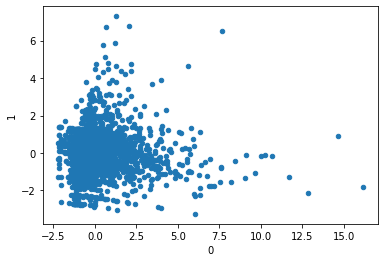

In [ ]:
from sklearn.decomposition import PCA
ndf = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]]
ndf = ndf.apply(lambda x: (x - x.mean())/x.std())
ndf_r = PCA(n_components=2).fit_transform(ndf)
ndf_r = pd.DataFrame(ndf_r)
ndf_r.plot(kind="scatter", x=0, y=1)

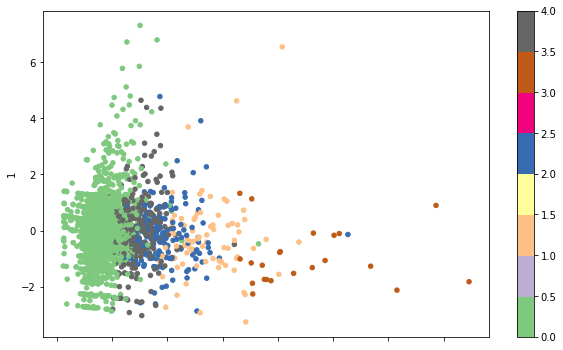

In [ ]:
from sklearn.decomposition import PCA
ndf = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]]
ndf = ndf.apply(lambda x: (x - x.mean())/x.std())
ndf_r = PCA(n_components=2).fit_transform(ndf)
ndf_r = pd.DataFrame(ndf_r)

kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_

ndf_r.plot(kind="scatter", x=0, y=1, c=kmeans.labels_.astype(float), colormap="Accent", figsize=(10,6))


In [ ]:
ndf = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]]
ndf_r = ndf[ndf.revenue != 0][ndf.budget != 0]
gain = (ndf_r.revenue - ndf_r.budget)
def labelF(x):
  if x > gain.mean() + (1*gain.std()): return "very high"
  elif x > gain.mean() + (0.5*gain.std()): return "high"
  elif x > gain.mean() - (0*gain.std()): return "medium"
  elif x > gain.mean() - (0.5*gain.std()): return "low"
  else: return "very low"
labels = gain.apply(labelF)
labels.value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


very low     383
low          336
medium       129
very high    117
high          64
dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


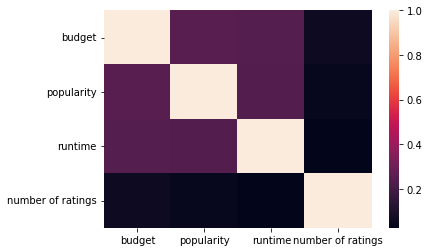

In [ ]:
ndf = movies[["budget", "popularity", "revenue", "runtime", "average rating", "number of ratings"]]
ndf_r = ndf[ndf.revenue != 0][ndf.budget != 0]
ndf_r = ndf_r.apply(lambda x: (x - x.mean())/x.std())
del ndf_r["revenue"]
del ndf_r["average rating"]
sns.heatmap(ndf_r.corr())

In [ ]:
ndf_r["labels"] = labels
ndf_rr = pd.DataFrame()
for x in ndf_r.labels.unique():
  sample = ndf_r[ndf_r["labels"]==x].sample(64)
  ndf_rr = pd.concat([ndf_rr, sample])
ndf_rr.labels.value_counts()


high         64
very high    64
low          64
medium       64
very low     64
Name: labels, dtype: int64

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
ndf_rrr = ndf_rr.copy()
classes = np.array(ndf_rrr.labels)
del ndf_rrr["labels"]
features = np.array(ndf_rrr)
trainx,testx,trainy,testy = train_test_split(features, classes, test_size = 0.25)
print(trainx.shape,"/",testx.shape," || ", trainy.shape,"/",testy.shape)

(240, 4) / (80, 4)  ||  (240,) / (80,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(trainx, trainy);
predictions = rf.predict(testx)
errors = predictions != testy
pd.Series(errors).value_counts()

True     57
False    23
dtype: int64

In [ ]:
counts = pd.Series(errors).value_counts()
acc = counts[True]/(counts[False]+counts[True]) 
print(f"Précision : {round(acc*100, 2)}%")

Précision : 71.25%


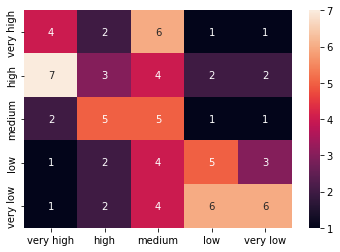

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib as plt

pd.Series(predictions).unique()
labels=["very high", "high", "medium", "low", "very low"]
cm = confusion_matrix(testy, predictions, labels)
hm = sns.heatmap(pd.DataFrame(cm, index = labels, columns= labels), annot=True)

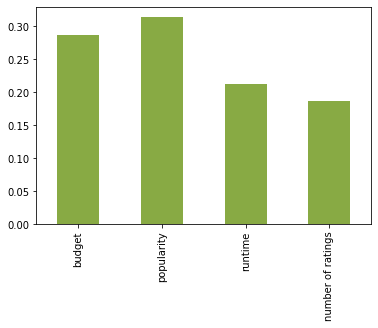

In [ ]:
fi = pd.Series(rf.feature_importances_, index=ndf_rrr.columns)
fi.plot(kind="bar", color="#88AA44")